In [0]:
# 目前遇到的問題是不會資料預處理 ----->跑模型數字怪怪的  確認不是模型的問題---->重新確認預處理資料哪裡有問題
# 將資料存到numpy 的 npz檔 之後------>ok
# 要做image generate

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#  載入套件
from glob import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
import keras
import os
import csv
from shutil import copyfile
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D 
from tensorflow.keras.models import Sequential, Model

In [0]:
IMG_SIZE = 224
class_map = {'A':0, 'B': 1, 'C': 2}

In [0]:
data_path = 'drive/My Drive/Colab Notebooks/AIMango/train/*/*.jpg' 
img_paths = glob(data_path)


data_count = len(img_paths)
print(data_count)
x = np.zeros((data_count, IMG_SIZE, IMG_SIZE, 3))
x = np.float32(x)
y = np.zeros((data_count, ))

# plt.imshow(img)
for i, path in tqdm(enumerate(img_paths)):  #TQDM進度條
    img = cv2.imread(path)
    img = img / 255. # normalize 0~255 -> 0~1
    img = img[:,:,::-1] #BGR -> RGB
    img_resize = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    # img_resize = img_resize.astype(np.float32)
    
    cls = path.split('/')[-2]
    
    x[i] = img_resize
    y[i] = class_map[cls]

5600


In [0]:
print(y.shape)
print(x.shape)

(5600,)
(5600, 224, 224, 3)


In [0]:
np.savez('/content/drive/My Drive/Colab Notebooks/AIMango/x_train1_1.npz', x=x, y=y)

In [0]:
load_x_train = np.load('/content/drive/My Drive/Colab Notebooks/AIMango/x_train1_1.npz')

In [0]:
y = load_x_train['y']

In [0]:
x = load_x_train['x']

In [0]:
data_path2 = 'drive/My Drive/Colab Notebooks/AIMango/dev/*/*.jpg'
img_paths2 = glob(data_path2)

data_count2 = len(img_paths2)
print(data_count2)
x2 = np.zeros((data_count2, IMG_SIZE, IMG_SIZE, 3))
x2 = np.float32(x2)
y2 = np.zeros((data_count2, ))

for i, path in tqdm(enumerate(img_paths2)):  #TQDM進度條
    img2 = cv2.imread(path)
    img2 = img2 / 255. # normalize 0~255 -> 0~1
    img2 = img2[:,:,::-1] #BGR -> RGB
    img2_resize = cv2.resize(img2, (IMG_SIZE, IMG_SIZE))

    cls = path.split('/')[-2]
    
    x2[i] = img2_resize
    y2[i] = class_map[cls]

800


In [0]:
print("type-x:",type(x2[0][0][0][0]))
print("type-y:",type(y2))

type-x: <class 'numpy.float32'>
type-y: <class 'numpy.ndarray'>


In [0]:
np.savez('/content/drive/My Drive/Colab Notebooks/AIMango/x_test1_1.npz', a=x2, b=y2)

In [0]:
load_x_test2 = np.load('/content/drive/My Drive/Colab Notebooks/AIMango/x_test1_1.npz')

In [0]:
y2 = load_x_test2['b']
x2 = load_x_test2['a']

In [0]:
print(y2.shape)
print(x2.shape)

(800,)
(800, 224, 224, 3)


In [0]:
# 打映圖片訓練集的概況
print(type(x))
print(x.shape)

print(x[0].shape)
print(type(x[0]))

In [0]:
# label count
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

# label count
unique, counts = np.unique(y2, return_counts=True)
dict(zip(unique, counts))

{0.0: 243, 1.0: 293, 2.0: 264}

In [0]:
# 打映圖片標籤的概況
# print(y[0])
# print(type(y[0]))

In [0]:
# X = X/255
import tensorflow
y_train_cat = tensorflow.keras.utils.to_categorical(y, num_classes=3)

# X = X/255
y_test_cat = tensorflow.keras.utils.to_categorical(y2, num_classes=3)

In [0]:
print(y_test_cat)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [0]:
print(y_train_cat.shape)
print(y_test_cat.shape)

(5600, 3)
(800, 3)


In [0]:
# # 分配訓練集及測試集比例
x_valid = x2[:400]
y_valid = y_test_cat[:400]
x_test = x2[400:]
y_test = y_test_cat[400:]
# x_train = X
# y_train = y_onehot
# x_test = X2
# y_test = y2_onehot

In [0]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(5600, 224, 224, 3)
(5600,)
(400, 224, 224, 3)
(400, 3)


In [0]:
# print(x_train[0])

In [0]:
# 將上面資料轉成圖片及檔案名出來

In [0]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

NameError: ignored

In [0]:
IMG_SIZE=224

In [0]:
# # 1
# inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# x = Conv2D(filters=16, kernel_size=3, activation='relu')(inputs)
# x = BatchNormalization()(x)
# x = Conv2D(filters=32, kernel_size=3, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Conv2D(filters=128, kernel_size=3, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Conv2D(filters=256, kernel_size=3, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Conv2D(filters=512, kernel_size=3, activation='relu')(x)
# x = BatchNormalization()(x)
# x = GlobalAveragePooling2D()(x)
# # x = Flatten()(x)
# x = Dense(3, activation=keras.activations.relu)(x)
# # x = Dense(128, activation=keras.activations.relu)(x)
# prediction = Dense(3, activation='softmax')(x)
# model = Model(inputs=inputs, outputs=prediction)

In [0]:
# 2
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(2, 2), padding="same", input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=512, kernel_size=(2, 2), strides=(2, 2), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(GlobalAveragePooling2D())
# model.add(Flatten())
model.add(Dense(3, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [0]:
model.summary()

In [0]:
keras.utils.plot_model(model, show_shapes=True)

In [0]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
print(x.shape)
print(y.shape)
print(x_valid.shape)
print(y_valid.shape)

(5600, 224, 224, 3)
(5600,)
(400, 224, 224, 3)
(400, 3)


In [0]:
model_history = model.fit(x, y_train_cat,
                batch_size=32,
                epochs=15,
                verbose=1,
                validation_data=(x_valid, y_valid))

Epoch 1/15
175/175 [==============================] - 6s 34ms/step - loss: 0.9170 - accuracy: 0.5661 - val_loss: 0.8156 - val_accuracy: 0.6150
Epoch 2/15
175/175 [==============================] - 6s 33ms/step - loss: 0.8365 - accuracy: 0.6095 - val_loss: 0.7681 - val_accuracy: 0.6350
Epoch 3/15
175/175 [==============================] - 6s 33ms/step - loss: 0.7951 - accuracy: 0.6421 - val_loss: 0.9091 - val_accuracy: 0.5050
Epoch 4/15
175/175 [==============================] - 6s 33ms/step - loss: 0.7429 - accuracy: 0.6727 - val_loss: 5.2293 - val_accuracy: 0.0050
Epoch 5/15
175/175 [==============================] - 6s 33ms/step - loss: 0.6849 - accuracy: 0.7064 - val_loss: 0.9597 - val_accuracy: 0.5975
Epoch 6/15
175/175 [==============================] - 6s 33ms/step - loss: 0.5960 - accuracy: 0.7437 - val_loss: 1.4652 - val_accuracy: 0.4000
Epoch 7/15
175/175 [==============================] - 6s 33ms/step - loss: 0.4664 - accuracy: 0.8061 - val_loss: 1.7405 - val_accuracy: 0.4175

In [0]:
zhistory = model_history.history

Text(0.5, 1.0, 'acc')

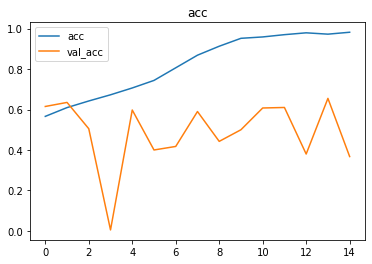

In [0]:
plt.plot(zhistory['accuracy'])
plt.plot(zhistory['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('acc')

Text(0.5, 1.0, 'loss')

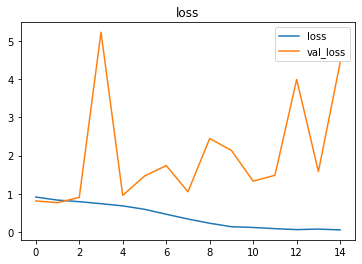

In [0]:
plt.plot(zhistory['loss'])
plt.plot(zhistory['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
y_true = np.argmax(y_test, axis=-1)
y_pred = np.argmax(model.predict(x_test), axis=-1)   #argmax 將每格中最大的值丟出
print(y_true.shape, y_pred.shape)
target_names = [str(i) for i in range(3)]
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))


(400,) (400,)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.55      0.20      0.29       136
           2       0.72      0.86      0.78       264

    accuracy                           0.63       400
   macro avg       0.42      0.35      0.36       400
weighted avg       0.66      0.63      0.61       400

[[  0   0   0]
 [ 20  27  89]
 [ 16  22 226]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
